# Exploration of the Slave Trade Database
The target of this Notebook is to take a closer look at the Data from the "Slave Trade Database" (Slave Voyages).

__[Slave Voyages](https://www.slavevoyages.org/)__

I'm therfore focusing on the data for the trans-atlantic slave trade.
The Database contains data about many ship that crossed the atlantic bringing slaves from Africa to the Americas.
As the downloadable __[File](https://www.slavevoyages.org/voyage/downloads#full-versions-of-the-trans-atlantic-slave-trade-database/0/en/)__ contains more than 200 columns I used only a selection of the available data. See __[Data import](#Data-import)__

In [1]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import numpy as np

### Data import

In [2]:
#Import of SPSS-File of the Database, using a selection of columns
slave_voyages = pd.read_spss('../use_case/tastdb-exp-2020.sav',
usecols=[
		"VOYAGEID", #Voyage identification number
		"SHIPNAME", #Name of vessel
		"NATINIMP",	#Imputed country in which ship registered
		"GUNS",		#Guns mounted
		"TONMOD",	#Tonnage standardized on British measured tons, 1773-1835
		"YRCONS",	#Year of vessel’s construction
		"PLACCONS",	#Place where vessel constructed
		"FATE",		#Particular outcome of voyage
		"FATE2",	#Outcome of voyage for slaves
		"MAJBUYPT",	#Principal place of slave purchase
		"MAJSELPT",	#Principal port of slave disembarkation
		"DATEBUY",	#Date that slave purchase began
		"DATELAND1",#Date that slaves landed at first place (YYYY-MM-DD)
		"VOYAGE",	#Length of Middle Passage in days
		"YEAR5",	#5-year period in which voyage occurred
		"YEAR10",	#Decade in which voyage occurred
		"YEAR25",	#Quarter-century in which voyage occurred
		"YEAR100",	#Century in which voyage occurred
		"VOY2IMP",	#Voyage length from leaving Africa to disembarkation (days)
		"CREW1",	#Crew at voyage outset
		"CREWDIED",	#Crew died during complete voyage
		"NDESERT",	#Total number of crew deserted
		"PTDEPIMP",	#Imputed port where voyage began
		"MJBYPTIMP",#Imputed principal place of slave purchase
		"MAJBYIMP",	#Imputed principal region of slave purchase
		"MAJBYIMP1",#Imputed broad region of slave purchase
		"MJSLPTIMP",#Imputed principal port of slave disembarkation
		"MJSELIMP",	#Imputed principal region of slave disembarkation
		"MJSELIMP1",#Imputed broad region of slave disembarkation
		"YEARDEP",	#Year voyage began (imputed)	
		"YEARAF",	#Year departed Africa (imputed)
		"YEARAM",	#Year of arrival at port of disembarkation (imputed)
		"SLAXIMP",	#Imputed total slaves embarked
		"SLAMIMP",	#Imputed total slaves disembarked
		"MENRAT7",	#Percentage of men at departure or arrival
		"WOMRAT7",	#Percentage of women at departure or arrival
		"BOYRAT7",	#Percentage of boys at departure or arrival
		"GIRLRAT7",	#Percentage of girls at departure or arrival
		"SLADVOY",	#Slaves deaths between African and the Americas
		"VYMRTRAT",	#Slave mortality rate (slave deaths / slaves embarked)
		"JAMCASPR"	#Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica

		])

Source of the Datafile:
https://www.slavevoyages.org/voyage/downloads#full-versions-of-the-trans-atlantic-slave-trade-database/0/en/

In [3]:
#Change datatype of ID-column and set it as index
slave_voyages = slave_voyages.astype({'VOYAGEID': int})
slave_voyages = slave_voyages.set_index("VOYAGEID")

In [4]:
#Set years-columns as Integers
slave_voyages[["YEARDEP","YEARAF","YEARAM","VOY2IMP","CREW1","CREWDIED","NDESERT","SLAXIMP","SLAMIMP","SLADVOY","YEAR100"]] = slave_voyages[["YEARDEP","YEARAF","YEARAM","VOY2IMP","CREW1","CREWDIED","NDESERT","SLAXIMP","SLAMIMP","SLADVOY","YEAR100"]].astype('Int64')

In [8]:
slave_voyages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36108 entries, 1 to 900237
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BOYRAT7    3464 non-null   float64 
 1   CREW       40 non-null     Int64   
 2   CREWDIED   4457 non-null   Int64   
 3   DATEBUY    6627 non-null   object  
 4   DATELAND1  18202 non-null  object  
 5   FATE       36108 non-null  category
 6   FATE2      36108 non-null  category
 7   GIRLRAT7   3461 non-null   float64 
 8   GUNS       6185 non-null   float64 
 9   JAMCASPR   949 non-null    float64 
 10  MAJBUYPT   21958 non-null  category
 11  MAJBYIMP   34421 non-null  category
 12  MAJBYIMP1  34421 non-null  category
 13  MAJSELPT   25704 non-null  category
 14  MENRAT7    3468 non-null   float64 
 15  MJBYPTIMP  34421 non-null  category
 16  MJSELIMP   31841 non-null  category
 17  MJSELIMP1  31842 non-null  category
 18  MJSLPTIMP  31842 non-null  category
 19  NATINIMP   33920 non-null  ca

In [58]:
#Inspect head of data
slave_voyages.head()

,BOYRAT7,CREW1,CREWDIED,DATEBUY,DATELAND1,FATE,FATE2,GIRLRAT7,GUNS,JAMCASPR,...,VYMRTRAT,WOMRAT7,YEAR5,YEAR10,YEAR25,YEAR100,YEARAF,YEARAM,YEARDEP,YRCONS
VOYAGEID,,,,,,,,,,,,,,,,,,,,,
1,NaN,<NA>,<NA>,NaN,1817-01-16,Sold slaves in Americas - subsequent fate unknown,Slaves disembarked Americas,NaN,NaN,NaN,...,0.28,NaN,years 1816-20,years 1811-20,years 1801-25,1800,1816,1817,1816,NaN
2,NaN,30,<NA>,NaN,1817-01-17,Voyage completed as intended,Slaves disembarked Americas,NaN,NaN,NaN,...,NaN,NaN,years 1816-20,years 1811-20,years 1801-25,1800,1817,1817,1816,NaN
3,NaN,28,<NA>,NaN,1817-01-17,Voyage completed as intended,Slaves disembarked Americas,NaN,NaN,NaN,...,0.14,NaN,years 1816-20,years 1811-20,years 1801-25,1800,1817,1817,1816,NaN
4,NaN,<NA>,<NA>,NaN,1817-02-27,Sold slaves in Americas - subsequent fate unknown,Slaves disembarked Americas,NaN,NaN,NaN,...,0.10,NaN,years 1816-20,years 1811-20,years 1801-25,1800,1817,1817,1816,NaN
5,NaN,<NA>,<NA>,NaN,1817-03-14,Voyage completed as intended,Slaves disembarked Americas,NaN,NaN,NaN,...,NaN,NaN,years 1816-20,years 1811-20,years 1801-25,1800,1817,1817,1817,NaN


In [59]:
#Inspection tail of data
slave_voyages.tail()

,BOYRAT7,CREW1,CREWDIED,DATEBUY,DATELAND1,FATE,FATE2,GIRLRAT7,GUNS,JAMCASPR,...,VYMRTRAT,WOMRAT7,YEAR5,YEAR10,YEAR25,YEAR100,YEARAF,YEARAM,YEARDEP,YRCONS
VOYAGEID,,,,,,,,,,,,,,,,,,,,,
900233,NaN,<NA>,<NA>,NaN,NaN,"Arrived in Africa, subsequent fate unknown","Slaves embarked, transhipped or no further record",NaN,NaN,NaN,...,NaN,NaN,years 1846-50,years 1841-50,years 1826-50,1800,1849,1849,1849,NaN
900234,NaN,<NA>,<NA>,NaN,NaN,"Arrived in Africa, subsequent fate unknown","Slaves embarked, transhipped or no further record",NaN,NaN,NaN,...,NaN,NaN,years 1846-50,years 1841-50,years 1826-50,1800,1850,1850,1850,NaN
900235,NaN,<NA>,<NA>,NaN,NaN,"Left home port, no further record",No information on slaves,NaN,NaN,NaN,...,NaN,NaN,years 1851-55,years 1851-60,years 1851-75,1800,1851,1851,1851,NaN
900236,NaN,<NA>,<NA>,NaN,NaN,"Arrived in Africa, subsequent fate unknown","Slaves embarked, transhipped or no further record",NaN,NaN,NaN,...,NaN,NaN,years 1851-55,years 1851-60,years 1851-75,1800,1851,1851,1851,NaN
900237,NaN,<NA>,<NA>,NaN,NaN,"Arrived in Africa, subsequent fate unknown","Slaves embarked, transhipped or no further record",NaN,NaN,NaN,...,NaN,NaN,years 1851-55,years 1851-60,years 1851-75,1800,1851,1851,1851,NaN


The inspection of the info, head and tail of the data showed that many cells of the 36108 data rows are empty. This must be considered when further interpreting the data.

TODO: Daten dokumentieren!!!, Infos auf Website über die einzelnen Spalten und das Dataset, welche Downgeloadet und welche nicht!!

The following list gives the information given on the website for the used variable. It shows which variables are used and how many entries these have. It is shortened to only display the used variables.

In [60]:
slave_voyages["CREW1"].count()

12732

<div class="page-title-1">Variable List</div>
<div id="variables-list">
<table class="table table-striped table-bordered dataTable no-footer">
<thead>
<tr><th>Variables</th><th>SPSS</th><th>Voyages</th><th>Estimates</th><th>Note</th></tr>
</thead>
<thead>
<tr><th>Ship, nation, owners</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
</thead>
<tbody>
<tr>
<td>Voyage identification number</td>
<td>VOYAGEID</td>
<td>36,108</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Vessel name</td>
<td>SHIPNAME</td>
<td>36,108</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<td>Flag (IMP)</td>
<td>NATINIMP</td>
<td>33,920</td>
<td>•</td>
<td>Flag regrouped into seven major national carriers</td>
</tr>
<tr>
<td>Place constructed</td>
<td>PLACCONS</td>
<td>9,201</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Year constructed</td>
<td>YRCONS</td>
<td>6,261</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<td>Standardized tonnage IMP</td>
<td>TONMOD</td>
<td>16,704</td>
<td>&nbsp;</td>
<td>Converted to pre-1786 British registered tons</td>
</tr>
<tr>
<td>Guns mounted</td>
<td>GUNS</td>
<td>6,185</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
</tbody>
<thead>
<tr><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
<tr><th>Voyage Outcome</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
</thead>
<tbody>
<tr>
<td>Particular outcome of voyage</td>
<td>FATE</td>
<td>36,108</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Outcome of voyage for slaves</td>
<td>FATE2</td>
<td>36,108</td>
<td>&nbsp;</td>
<td>Derived from particular outcome</td>
</tr>
</tbody>
<thead>
<tr><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
<tr><th>Voyage Itinerary</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
</thead>
<tbody>
<tr>
<td>Principal place of slave purchase</td>
<td>MAJBUYPT</td>
<td>21,958</td>
<td>&nbsp;</td>
<td>Principal place of slave purchase</td>
</tr>
<tr>
<td>Principal port of slave disembarkation</td>
<td>MAJSELPT</td>
<td>25,704</td>
<td>&nbsp;</td>
<td>Principal port of slave disembarkation</td>
</tr>
<tr>
<td>Place where voyage began IMP</td>
<td>PTDEPIMP</td>
<td>31,633</td>
<td>&nbsp;</td>
<td>Same as data variable in most cases, but derived from port of return for certain Brazilian voyages</td>
</tr>
<tr>
<td>Principal place of slave purchase IMP</td>
<td>MJBYPTIMP</td>
<td>34,421</td>
<td>•</td>
<td>Place where largest number of captives embarked</td>
</tr>
<tr>
<td>Imputed principal region of slave purchase</td>
<td>MAJBYIMP</td>
<td>34,421</td>
<td>•</td>
<td>Place where largest number of captives embarked</td>
</tr>
<tr>
<td>Imputed broad region of slave purchase</td>
<td>MAJBYIMP1</td>
<td>34,421</td>
<td>•</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Principal place of slave landing IMP</td>
<td>MJSLPTIMP</td>
<td>31,842</td>
<td>•</td>
<td>Place where largest number of captives embarked</td>
</tr>
<tr>
<td>Imputed principal region of slave disembarkation</td>
<td>MJSELIMP</td>
<td>31,842</td>
<td>•</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Imputed broad region of slave disembarkation</td>
<td>MJSELIMP1</td>
<td>31,842</td>
<td>•</td>
<td>&nbsp;</td>
</tr>
</tbody>
<thead>
<tr><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
<tr><th>Voyage Dates</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
</thead>
<tbody>
<tr>
<td>Year voyage began (imputed)</td>
<td>YEARDEP</td>
<td>?</td>
<td>•</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Year departed Africa (imputed)</td>
<td>YEARAF</td>
<td>36,108</td>
<td>•</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Year arrived with slaves IMP</td>
<td>YEARAM</td>
<td>36,108</td>
<td>•</td>
<td>Standard variable for classification by year of voyage</td>
</tr>
<td>Date trade began in Africa</td>
<td>DATEBUY</td>
<td>6,627</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Date arrived with slaves</td>
<td>DATELAND1</td>
<td>18,202</td>
<td>•</td>
<td>Date that slaves landed at first place (YYYY-MM-DD)</td>
</tr>
<tr>
<td>Middle passage (days)</td>
<td>VOY2IMP</td>
<td>7,308</td>
<td>&nbsp;</td>
<td>Difference between date vessel left Africa and date it arrived with slaves</td>
</tr>
<tr>
<td>5-year period in which voyage occurred</td>
<td>YEAR5</td>
<td>36,108/td>
<td>&nbsp;</td>
<td>5-year period in which voyage occurred</td>
</tr>
<tr>
<td>10-year period in which voyage occurred</td>
<td>YEAR10</td>
<td>36,108</td>
<td>&nbsp;</td>
<td>10-year period in which voyage occurred</td>
</tr>
<tr>
<td>25-year period in which voyage occurred</td>
<td>YEAR25</td>
<td>36,108</td>
<td>&nbsp;</td>
<td>25-year period in which voyage occurred</td>
</tr>
<tr>
<td>100-year period in which voyage occurred</td>
<td>YEAR100</td>
<td>36,108</td>
<td>&nbsp;</td>
<td>100-year period in which voyage occurred</td>
</tr>
</tbody>
<thead>
<tr><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
<tr><th>Captain and Crew</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
</thead>
<tbody>
<tr>
<td>Crew at voyage outset</td>
<td>CREW1</td>
<td>12,732</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Crew deaths during voyage</td>
<td>CREWDIED</td>
<td>4,457</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Total number of crew deserted</td>
<td>NDESERT</td>
<td>2,326</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
</tbody>
<thead>
<tr><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
<tr><th>Slave (numbers)</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
</thead>
<tbody>
<tr>
<td>Total slaves embarked IMP</td>
<td>SLAXIMP</td>
<td>34,477</td>
<td>•</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Total slaves disembarked IMP</td>
<td>SLAMIMP</td>
<td>34,182</td>
<td>•</td>
<td>Estimated disembarkations</td>
</tr>
</tbody>
<thead>
<tr><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
<tr><th>Slave (characteristics)</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr>
</thead>
<tbody>
<tr>
<td>Percentage men</td>
<td>MENRAT7</td>
<td>3,468</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Percentage women</td>
<td>WOMRAT7</td>
<td>3,468</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Percentage boys</td>
<td>BOYRAT7</td>
<td>3,464</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Percentage girls</td>
<td>GIRLRAT7</td>
<td>3,461</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Slaves deaths between African and the Americas</td>
<td>SLADVOY</td>
<td>3,914</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Sterling cash price in Jamaica</td>
<td>JAMCASPR</td>
<td>954</td>
<td>&nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td>Mortality rate IMP</td>
<td>VYMRTRAT</td>
<td>6,477</td>
<td>•</td>
<td>Documented or difference between embarked and disembarked captives (data variables)</td>
</tr>
</tbody>
</table>
</div>
</div></div></div>
__[Source](https://www.slavevoyages.org/voyage/about#variable-list/2/en/)__ edited

In [61]:
slave_voyages.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36108 entries, 1 to 900237
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BOYRAT7    3464 non-null   float64 
 1   CREW1      12732 non-null  Int64   
 2   CREWDIED   4457 non-null   Int64   
 3   DATEBUY    6627 non-null   object  
 4   DATELAND1  18202 non-null  object  
 5   FATE       36108 non-null  category
 6   FATE2      36108 non-null  category
 7   GIRLRAT7   3461 non-null   float64 
 8   GUNS       6185 non-null   float64 
 9   JAMCASPR   949 non-null    float64 
 10  MAJBUYPT   21958 non-null  category
 11  MAJBYIMP   34421 non-null  category
 12  MAJBYIMP1  34421 non-null  category
 13  MAJSELPT   25704 non-null  category
 14  MENRAT7    3468 non-null   float64 
 15  MJBYPTIMP  34421 non-null  category
 16  MJSELIMP   31841 non-null  category
 17  MJSELIMP1  31842 non-null  category
 18  MJSLPTIMP  31842 non-null  category
 19  NATINIMP   33920 non-null  ca

In [63]:
#Output of columns with indices
col = 0
for i in slave_voyages.columns:
    print(col, " ", i)
    col+=1

0   BOYRAT7
1   CREW1
2   CREWDIED
3   DATEBUY
4   DATELAND1
5   FATE
6   FATE2
7   GIRLRAT7
8   GUNS
9   JAMCASPR
10   MAJBUYPT
11   MAJBYIMP
12   MAJBYIMP1
13   MAJSELPT
14   MENRAT7
15   MJBYPTIMP
16   MJSELIMP
17   MJSELIMP1
18   MJSLPTIMP
19   NATINIMP
20   NDESERT
21   PLACCONS
22   PTDEPIMP
23   SHIPNAME
24   SLADVOY
25   SLAMIMP
26   SLAXIMP
27   TONMOD
28   VOY2IMP
29   VOYAGE
30   VYMRTRAT
31   WOMRAT7
32   YEAR5
33   YEAR10
34   YEAR25
35   YEAR100
36   YEARAF
37   YEARAM
38   YEARDEP
39   YRCONS


In [67]:
#Price
slave_voyages["JAMCASPR"]

VOYAGEID
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
          ..
900233   NaN
900234   NaN
900235   NaN
900236   NaN
900237   NaN
Name: JAMCASPR, Length: 36108, dtype: float64

In [74]:
slave_voyages.describe()

,BOYRAT7,CREW1,CREWDIED,GIRLRAT7,GUNS,JAMCASPR,MENRAT7,NDESERT,SLADVOY,SLAMIMP,...,TONMOD,VOY2IMP,VOYAGE,VYMRTRAT,WOMRAT7,YEAR100,YEARAF,YEARAM,YEARDEP,YRCONS
count,3464.000000,12732.0,4457.0,3461.000000,6185.000000,949.000000,3468.000000,2326.0,3914.0,34182.0,...,16704.000000,7308.0,4045.000000,6477.000000,3468.000000,36108.0,36108.0,36108.0,36108.0,6261.000000
mean,0.154412,30.123626,6.886246,0.091625,8.255133,38.844046,0.491179,3.747206,42.885028,269.235124,...,193.833142,60.391352,52.904574,0.121785,0.263436,1715.774898,1764.264983,1764.327185,1763.864296,1767.698610
std,0.110351,15.924246,6.881553,0.075774,6.473318,18.303013,0.147135,4.197765,62.719134,137.320017,...,98.293814,33.070504,28.000676,0.148845,0.120238,68.603335,59.487223,59.468134,59.519535,28.117804
min,0.000000,0.0,0.0,0.000000,0.000000,11.720000,0.000000,0.0,0.0,0.0,...,10.000000,11.0,1.000000,0.000000,0.000000,1500.0,1514.0,1514.0,1514.0,1548.000000
25%,0.074453,20.0,2.0,0.035710,4.000000,23.190000,0.397332,1.0,7.25,177.0,...,127.000000,38.0,34.000000,0.030000,0.182930,1700.0,1732.0,1732.0,1732.0,1750.000000
50%,0.137250,28.0,5.0,0.077220,6.000000,36.090000,0.489705,2.0,22.0,261.0,...,182.300000,53.0,45.000000,0.070000,0.255320,1700.0,1773.0,1773.0,1772.0,1769.000000
75%,0.214355,37.0,9.0,0.129810,10.000000,49.940000,0.584750,5.0,53.0,350.0,...,257.300000,73.0,63.000000,0.160000,0.338210,1800.0,1806.0,1806.0,1806.0,1787.000000
max,0.905410,606.0,94.0,0.629030,80.000000,101.150000,1.000000,38.0,998.0,1700.0,...,1269.200000,532.0,310.000000,1.000000,1.000000,1800.0,1866.0,1866.0,1866.0,1858.000000


<Axes: >

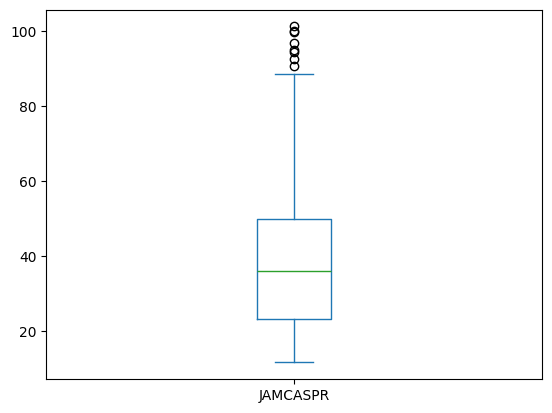

In [75]:
slave_voyages["JAMCASPR"].plot(kind="box")

In [76]:
slave_voyages["JAMCASPR"].max()

101.15

C:\Users\André\AppData\Local\Temp\ipykernel_14036\126487903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=slave_voyages,kind="bar",x="NATINIMP",y="SLAXIMP", palette="dark", legend=False).tick_params(axis='x', rotation=90)


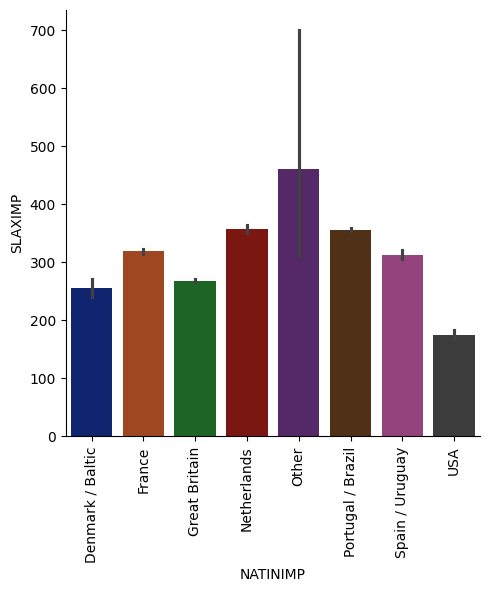

In [78]:
slave_voyages["NATINIMP"]
sns.catplot(data=slave_voyages,kind="bar",x="NATINIMP",y="SLAXIMP", palette="dark", legend=False).tick_params(axis='x', rotation=90)

In [79]:
slave_voyages["NATINIMP"].value_counts()

NATINIMP
Great Britain        12015
Portugal / Brazil    11363
France                4204
USA                   2275
Spain / Uruguay       1928
Netherlands           1707
Denmark / Baltic       412
Other                   16
Name: count, dtype: int64

<Axes: >

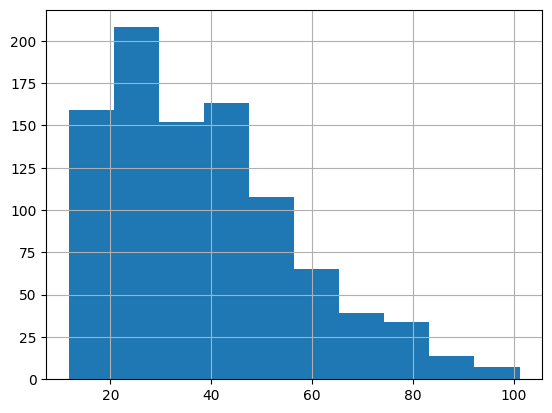

In [80]:
#Analysing the distribution of Data
slave_voyages["JAMCASPR"].hist()

(1650.0, 1801.0)

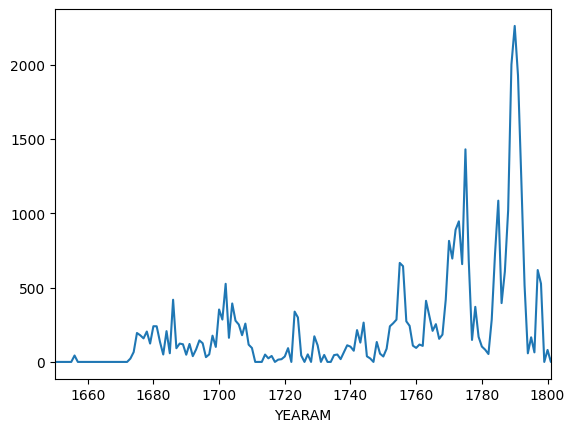

In [98]:
slave_voyages.groupby(["YEARAM"],sort=True,dropna=True)["JAMCASPR"].sum().plot(kind="line")
plt.xlim([1650, 1801])

<Axes: xlabel='YEARAM'>

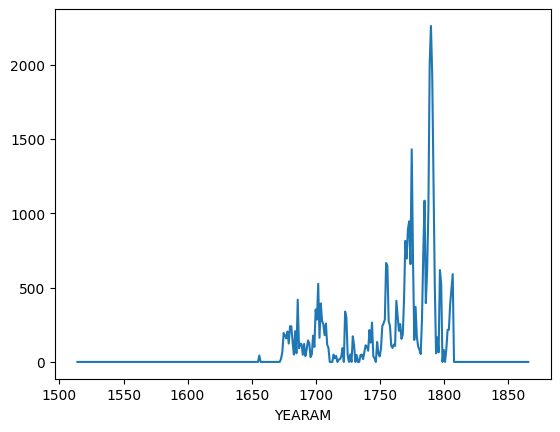

In [99]:
slave_voyages.groupby(["YEARAM"],sort=True,dropna=True)["JAMCASPR"].sum().plot(kind="line")

In [100]:
slave_voyages["PTDEPIMP"].value_counts()

PTDEPIMP
Liverpool                  4973
Bahia, port unspecified    4478
London                     3126
Rio de Janeiro             2545
Bristol                    2083
                           ... 
Marblehead                    1
Lower James River             1
Limerick                      1
Les Sables                    1
Zuider Zee                    1
Name: count, Length: 243, dtype: int64

In [103]:
import geopandas as gpd
import folium

datafiles for geocoding are in folder!!!
https://guides.library.ucsc.edu/DS/Resources/Class-Specific/LALS194E/MappingData

In [68]:
map=folium.Map(location=[48.5,16.5], tiles = "OpenStreetMap", zoom_start=10)
map

In [ ]:
#converting geometries
geometry = df.points_from_xy(df.lng,df.ltd)
#create geodataframe
geo_df = gpd.GeoDataFrame(df,geometry=geometry)
#map - plotting the geometries
geo_df.plot()
#Using folium (OSM-Data)
#create/extract the list of points

<Axes: >

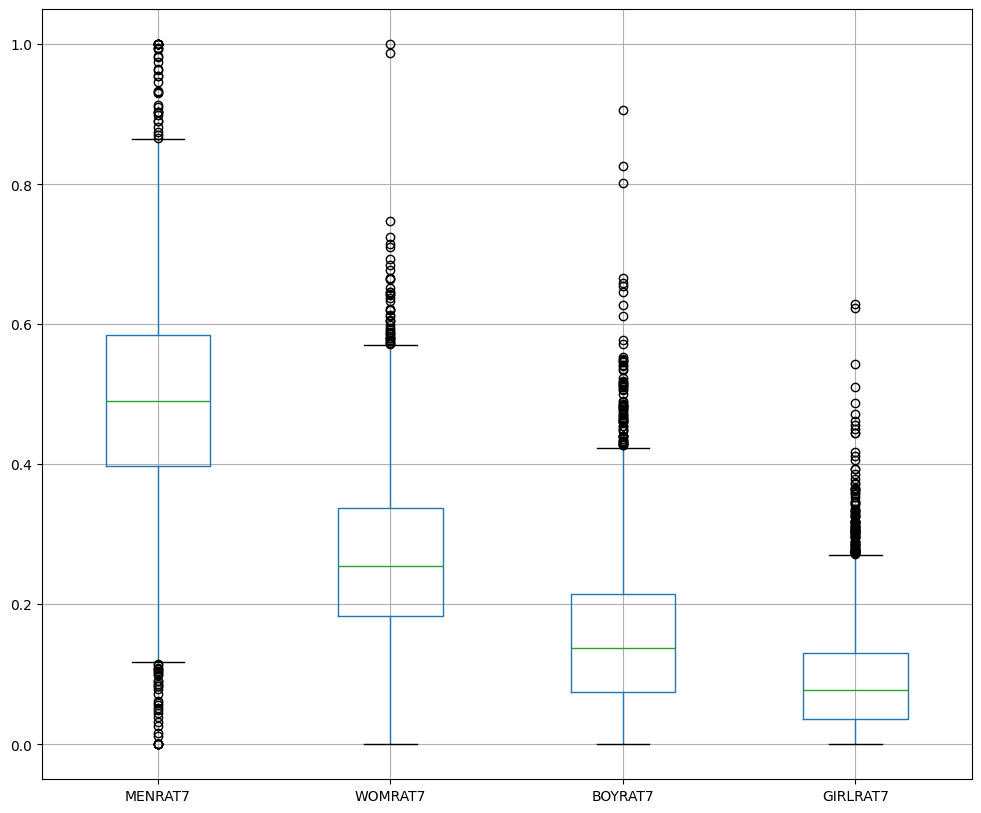

In [16]:
slave_voyages[["MENRAT7","WOMRAT7","BOYRAT7","GIRLRAT7"]].boxplot(return_type = 'axes', figsize=(12,10), showfliers=True)

<Axes: xlabel='SLADVOY', ylabel='JAMCASPR'>

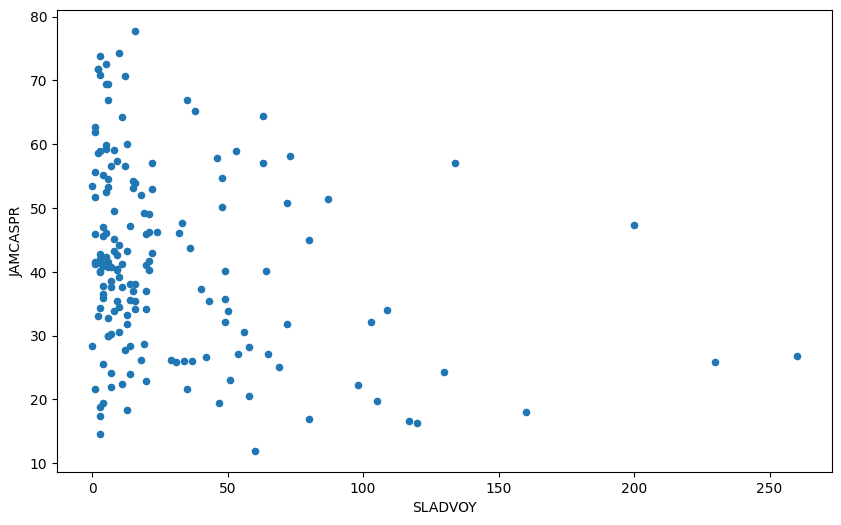

In [20]:
slave_voyages.plot(figsize=(10,6),x="SLADVOY", y="JAMCASPR",kind="scatter")

<Axes: xlabel='SLAXIMP', ylabel='VYMRTRAT'>

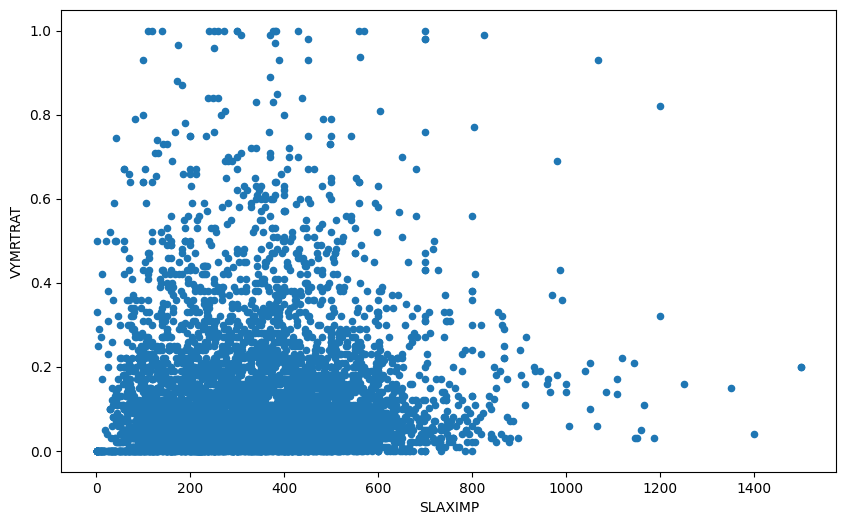

In [21]:
slave_voyages.plot(figsize=(10,6),x="SLAXIMP", y="VYMRTRAT",kind="scatter")

<Axes: xlabel='NATINIMP', ylabel='count of voyages'>

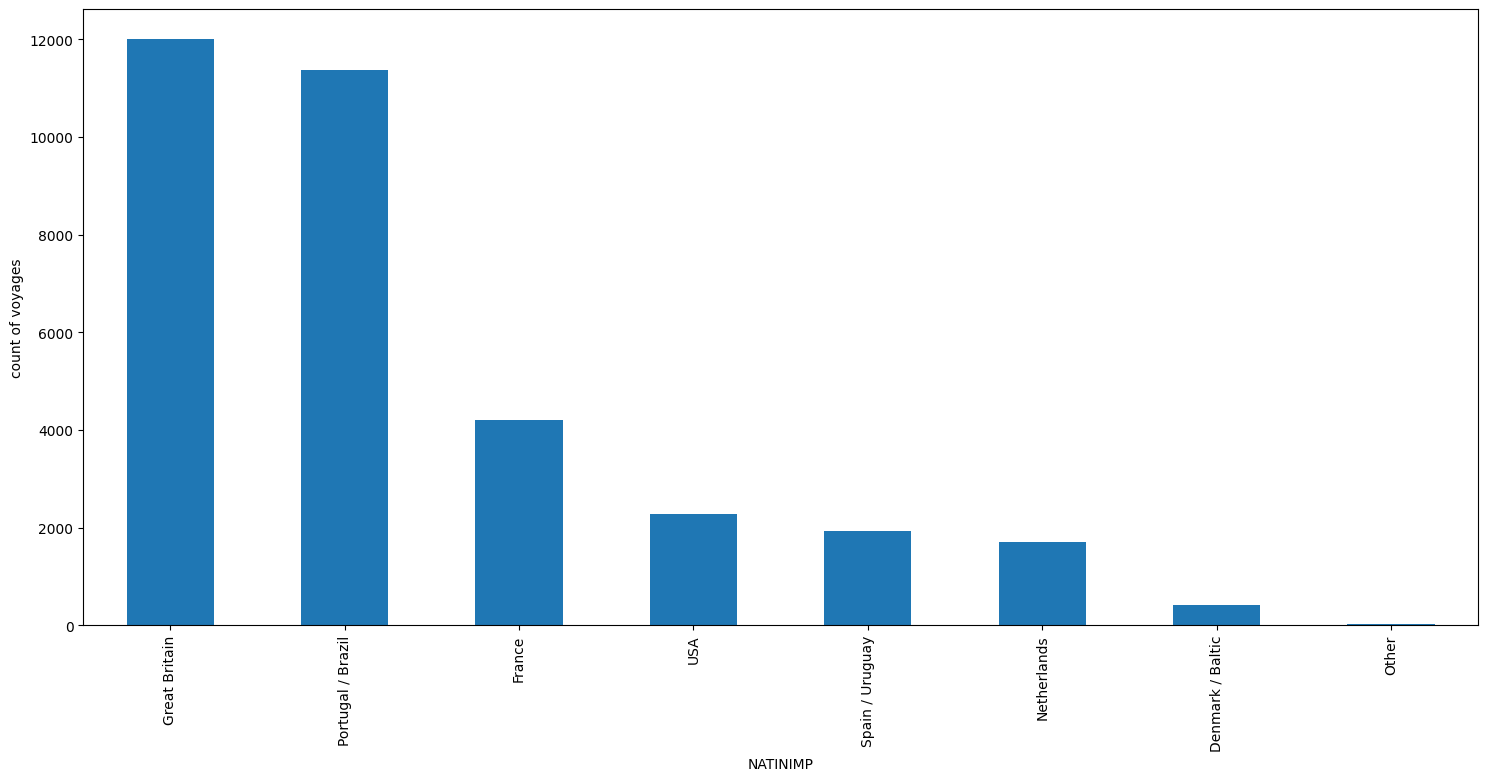

In [22]:
slave_voyages["NATINIMP"].value_counts(False).plot(kind='bar', figsize=(18,8),ylabel='count of voyages')

In [17]:
slave_voyages.describe()

,BOYRAT1,CREW,CREWDIED,GIRLRAT1,GUNS,JAMCASPR,MENRAT1,NDESERT,SLADVOY,SLAMIMP,...,TONMOD,VOY2IMP,VOYAGE,VYMRTRAT,WOMRAT1,YEAR100,YEARAF,YEARAM,YEARDEP,YRCONS
count,900.000000,40.0,4457.0,899.000000,6185.000000,949.000000,901.000000,2326.0,3914.0,34182.0,...,16704.000000,7308.0,4045.000000,6477.000000,901.000000,36108.0,36108.0,36108.0,36108.0,6261.000000
mean,0.122851,18.25,6.886246,0.071514,8.255133,38.844046,0.530747,3.747206,42.885028,269.235124,...,193.833142,60.391352,52.904574,0.121785,0.277403,1715.774898,1764.264983,1764.327185,1763.864296,1767.698610
std,0.104431,13.744463,6.881553,0.074018,6.473318,18.303013,0.151145,4.197765,62.719134,137.320017,...,98.293814,33.070504,28.000676,0.148845,0.112870,68.603335,59.487223,59.468134,59.519535,28.117804
min,0.000000,7.0,0.0,0.000000,0.000000,11.720000,0.011905,0.0,0.0,0.0,...,10.000000,11.0,1.000000,0.000000,0.000000,1500.0,1514.0,1514.0,1514.0,1548.000000
25%,0.047165,12.75,2.0,0.018735,4.000000,23.190000,0.437500,1.0,7.25,177.0,...,127.000000,38.0,34.000000,0.030000,0.210190,1700.0,1732.0,1732.0,1732.0,1750.000000
50%,0.100000,14.0,5.0,0.056930,6.000000,36.090000,0.528942,2.0,22.0,261.0,...,182.300000,53.0,45.000000,0.070000,0.280990,1700.0,1773.0,1773.0,1772.0,1769.000000
75%,0.169118,17.5,9.0,0.104355,10.000000,49.940000,0.613508,5.0,53.0,350.0,...,257.300000,73.0,63.000000,0.160000,0.344500,1800.0,1806.0,1806.0,1806.0,1787.000000
max,0.801980,86.0,94.0,1.000000,80.000000,101.150000,1.000000,38.0,998.0,1700.0,...,1269.200000,532.0,310.000000,1.000000,0.988100,1800.0,1866.0,1866.0,1866.0,1858.000000


<Axes: >

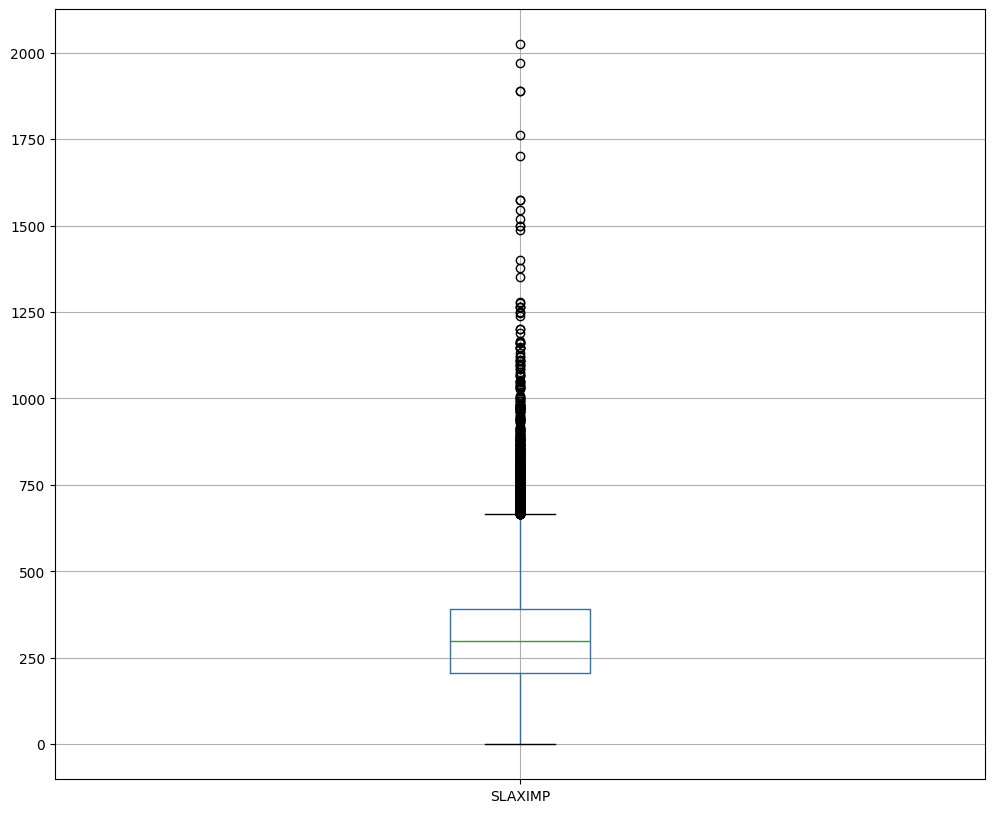

In [18]:
slave_voyages.boxplot('SLAXIMP',return_type = 'axes', figsize=(12,10), showfliers=True)

<Axes: >

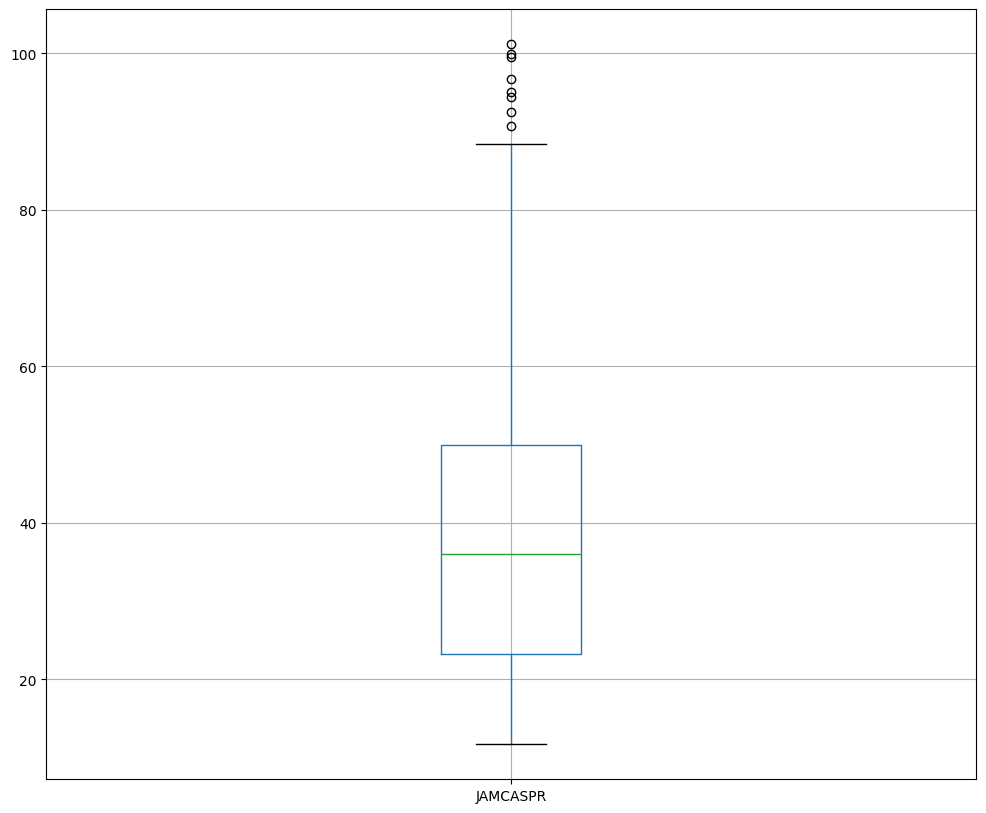

In [20]:
slave_voyages.boxplot('JAMCASPR',return_type = 'axes', figsize=(12,10), showfliers=True)

<Axes: >

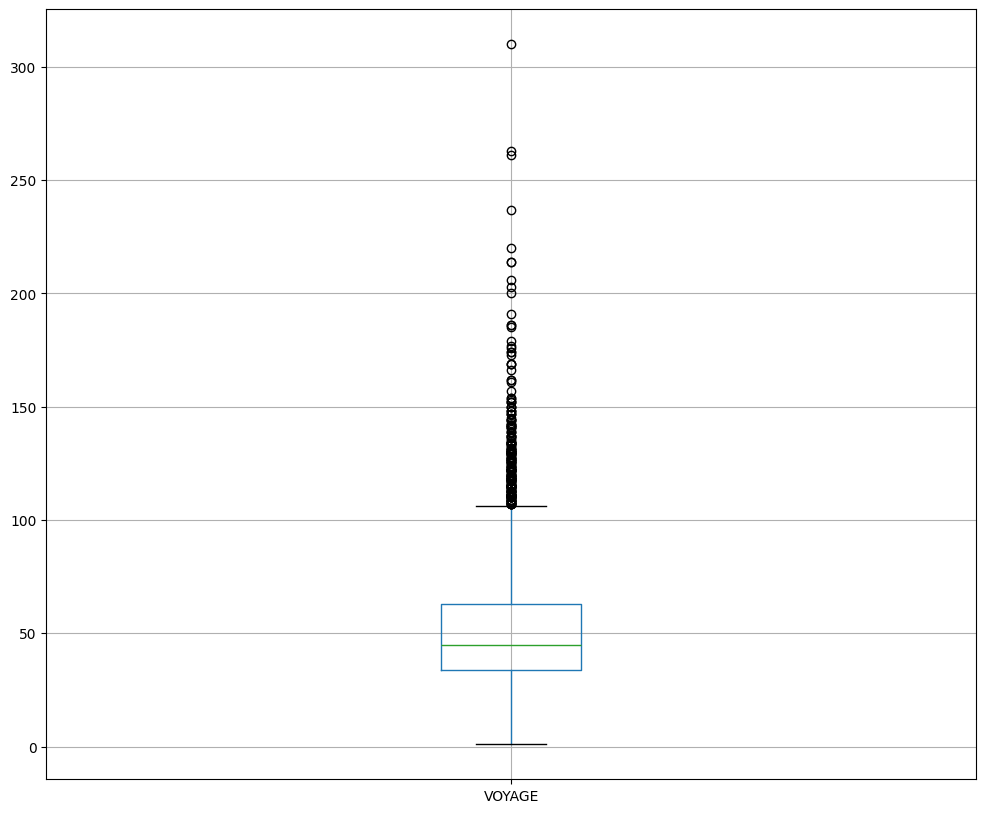

In [22]:
slave_voyages.boxplot('VOYAGE',return_type = 'axes', figsize=(12,10), showfliers=True)

<Axes: xlabel='YEARAM'>

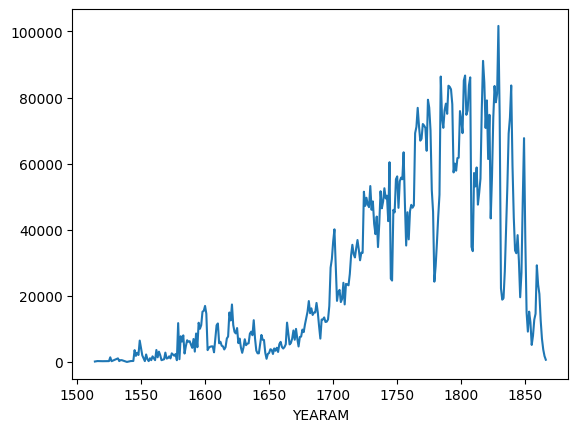

In [24]:
slave_voyages.groupby(["YEARAM"],sort=True)["SLAMIMP"].sum().plot(kind="line")

C:\Users\andre\AppData\Local\Temp\ipykernel_2604\143822635.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="YEARAM", y="SLAMIMP",


<Axes: xlabel='YEARAM', ylabel='SLAMIMP'>

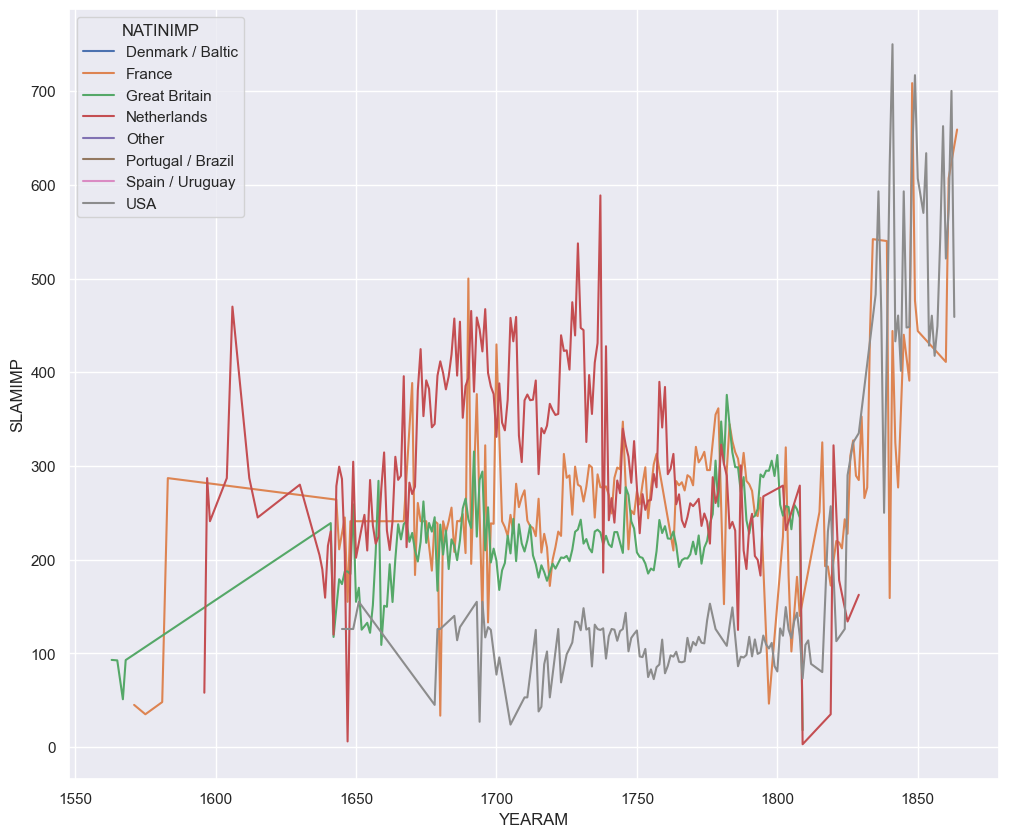

In [54]:
plt.figure(figsize=(12,10))
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="YEARAM", y="SLAMIMP",
             hue="NATINIMP",
             data=slave_voyages[slave_voyages["NATINIMP"].isin(["Great Britain","France","Netherlands","USA"])],
             ci=None)